In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r'D:\ICT kerala\project_main\data\pollution_us_2000_2016.csv')

# Understanding the data

In [3]:
data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [4]:
data.tail()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN
1746660,24603,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.100000,0.100,0,1.0


In [5]:
data.shape

(1746661, 29)

In [6]:
data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [7]:
data['Date Local'] = pd.to_datetime(data['Date Local'], format='%Y-%m')

In [8]:
data.nunique()

Unnamed: 0           134576
State Code               47
County Code              73
Site Num                110
Address                 204
State                    47
County                  133
City                    144
Date Local             5996
NO2 Units                 1
NO2 Mean              31859
NO2 1st Max Value       990
NO2 1st Max Hour         24
NO2 AQI                 129
O3 Units                  1
O3 Mean                8196
O3 1st Max Value        134
O3 1st Max Hour          24
O3 AQI                  125
SO2 Units                 1
SO2 Mean              12736
SO2 1st Max Value       921
SO2 1st Max Hour         24
SO2 AQI                 140
CO Units                  1
CO Mean               34123
CO 1st Max Value       2698
CO 1st Max Hour          24
CO AQI                  107
dtype: int64

In [9]:
data.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


* Now we can extract different parts of the date column into seperate columns

In [10]:
data['year'] = pd.DatetimeIndex(data['Date Local']).year

In [11]:
data['month'] = pd.DatetimeIndex(data['Date Local']).month

In [12]:
data['DOY'] = pd.DatetimeIndex(data['Date Local']).dayofyear

# Missing value handling 

In [13]:
data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'year', 'month', 'DOY'],
      dtype='object')

## Dropping Unwanted Columns and rows

In [14]:
data1 = data.drop(['Unnamed: 0', 'Address', 'State', 'County', 'County Code', 'Date Local', 'NO2 Units'
                  ,'SO2 Units', 'CO Units', 'O3 Units', 'Site Num'], axis = 1)

In [15]:
data1.drop(data1[data1['City'] == 'Not in a city'].index, inplace = True)

In [16]:
data1.tail()

,State Code,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month,DOY
1746296,53,Seattle,6.129167,11.4,8,10,0.028042,0.034,10,31,...,0.2,20,NaN,0.200000,0.200,0,2.0,2016,1,30
1746297,53,Seattle,7.966667,18.0,22,17,0.025632,0.030,9,28,...,0.5,7,0.0,0.195957,0.267,22,NaN,2016,1,31
1746298,53,Seattle,7.966667,18.0,22,17,0.025632,0.030,9,28,...,0.5,7,0.0,0.200000,0.200,0,2.0,2016,1,31
1746299,53,Seattle,7.966667,18.0,22,17,0.025632,0.030,9,28,...,0.3,8,NaN,0.195957,0.267,22,NaN,2016,1,31
1746300,53,Seattle,7.966667,18.0,22,17,0.025632,0.030,9,28,...,0.3,8,NaN,0.200000,0.200,0,2.0,2016,1,31


In [17]:
data1.shape

(1608250, 21)

In [18]:
data1 = data1.reset_index().drop('index', axis = 1)

In [19]:
data1.insert(0, 'key', range(0, data1.shape[0]))

In [20]:
data1

,key,State Code,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month,DOY
0,0,4,Phoenix,19.041667,49.0,19,46,0.022500,0.040,10,...,9.0,21,13.0,1.145833,4.200,21,NaN,2000,1,1
1,1,4,Phoenix,19.041667,49.0,19,46,0.022500,0.040,10,...,9.0,21,13.0,0.878947,2.200,23,25.0,2000,1,1
2,2,4,Phoenix,19.041667,49.0,19,46,0.022500,0.040,10,...,6.6,23,NaN,1.145833,4.200,21,NaN,2000,1,1
3,3,4,Phoenix,19.041667,49.0,19,46,0.022500,0.040,10,...,6.6,23,NaN,0.878947,2.200,23,25.0,2000,1,1
4,4,4,Phoenix,22.958333,36.0,19,34,0.013375,0.032,10,...,3.0,22,4.0,0.850000,1.600,23,NaN,2000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608245,1608245,53,Seattle,6.129167,11.4,8,10,0.028042,0.034,10,...,0.2,20,NaN,0.200000,0.200,0,2.0,2016,1,30
1608246,1608246,53,Seattle,7.966667,18.0,22,17,0.025632,0.030,9,...,0.5,7,0.0,0.195957,0.267,22,NaN,2016,1,31
1608247,1608247,53,Seattle,7.966667,18.0,22,17,0.025632,0.030,9,...,0.5,7,0.0,0.200000,0.200,0,2.0,2016,1,31
1608248,1608248,53,Seattle,7.966667,18.0,22,17,0.025632,0.030,9,...,0.3,8,NaN,0.195957,0.267,22,NaN,2016,1,31


## Encoding City column

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1['City'] = encoder.fit_transform(data1['City'])

In [22]:
data1.head()

,key,State Code,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month,DOY
0,0,4,97,19.041667,49.0,19,46,0.022500,0.040,10,...,9.0,21,13.0,1.145833,4.2,21,NaN,2000,1,1
1,1,4,97,19.041667,49.0,19,46,0.022500,0.040,10,...,9.0,21,13.0,0.878947,2.2,23,25.0,2000,1,1
2,2,4,97,19.041667,49.0,19,46,0.022500,0.040,10,...,6.6,23,NaN,1.145833,4.2,21,NaN,2000,1,1
3,3,4,97,19.041667,49.0,19,46,0.022500,0.040,10,...,6.6,23,NaN,0.878947,2.2,23,25.0,2000,1,1
4,4,4,97,22.958333,36.0,19,34,0.013375,0.032,10,...,3.0,22,4.0,0.850000,1.6,23,NaN,2000,1,2


## Missing Value Handling using Prediction models

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [24]:
train_co = data1[data1['CO AQI'].isna() == False]
test_co = data1[data1['CO AQI'].isna() == True]
y_co = train_co['CO AQI']
train_co.drop(['CO AQI', 'SO2 AQI'], axis = 1, inplace = True)
dt_model.fit(train_co, y_co)
test_co.drop(['CO AQI', 'SO2 AQI'], axis = 1, inplace = True)
co_pred = dt_model.predict(test_co)

In [25]:
train_co['CO AQI'] = y_co
test_co['CO AQI'] = co_pred

In [26]:
np.unique(co_pred)

array([  0.,   1.,   2.,   3.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  47.,  48.,  49.,
        50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  98., 101., 103., 106., 113., 115., 118., 126., 135.,
       136., 138., 143., 150., 159., 173., 183., 201.])

* Predicted CO values

In [27]:
train_so2 = data1[data1['SO2 AQI'].isna() == False]
test_so2 = data1[data1['SO2 AQI'].isna() == True]
y_so2 = train_so2['SO2 AQI']
train_so2.drop(['CO AQI', 'SO2 AQI'], axis = 1, inplace = True)
dt_model.fit(train_so2, y_so2)
test_so2.drop(['CO AQI', 'SO2 AQI'], axis = 1, inplace = True)
so2_pred = dt_model.predict(test_so2)

In [28]:
train_so2['SO2 AQI'] = y_so2
test_so2['SO2 AQI'] = so2_pred

In [29]:
np.unique(so2_pred)

array([  0.,   1.,   3.,   4.,   6.,   7.,   9.,  10.,  11.,  13.,  14.,
        16.,  17.,  19.,  20.,  21.,  23.,  24.,  26.,  27.,  29.,  30.,
        31.,  33.,  34.,  36.,  37.,  39.,  40.,  41.,  43.,  44.,  46.,
        47.,  49.,  50.,  51.,  52.,  54.,  55.,  56.,  57.,  59.,  60.,
        61.,  62.,  64.,  65.,  66.,  67.,  69.,  70.,  71.,  72.,  74.,
        75.,  76.,  77.,  79.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,
        89.,  90.,  91.,  92.,  94.,  95.,  96.,  97.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 110., 111., 112., 113.,
       114., 115., 116., 117., 118., 119., 121., 122., 123., 125., 126.,
       127., 131., 136., 139., 140., 145., 147., 153., 172., 200.])

In [30]:
merged1 = pd.concat([train_co,test_co],ignore_index=True)
merged2 = pd.concat([train_so2,test_so2],ignore_index=True)

In [31]:
df_1  = data1.drop(['CO AQI','SO2 AQI'],axis=1)

In [32]:
co_df = merged1[['CO AQI','key']]
so2_df = merged2[['SO2 AQI','key']]

In [33]:
imputed_df = pd.merge(co_df,so2_df,on='key').sort_values(by='key').reset_index().drop('index',axis=1)

In [34]:
imputed_df

,CO AQI,key,SO2 AQI
0,48.0,0,13.0
1,25.0,1,13.0
2,48.0,2,9.0
3,25.0,3,9.0
4,18.0,4,4.0
...,...,...,...
1608245,2.0,1608245,0.0
1608246,3.0,1608246,0.0
1608247,2.0,1608247,0.0
1608248,3.0,1608248,0.0


In [35]:
data_imputed = pd.merge(df_1,imputed_df,on='key').sort_values(by='key')
data_imputed.head()

,key,State Code,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,year,month,DOY,CO AQI,SO2 AQI
0,0,4,97,19.041667,49.0,19,46,0.022500,0.040,10,...,9.0,21,1.145833,4.2,21,2000,1,1,48.0,13.0
1,1,4,97,19.041667,49.0,19,46,0.022500,0.040,10,...,9.0,21,0.878947,2.2,23,2000,1,1,25.0,13.0
2,2,4,97,19.041667,49.0,19,46,0.022500,0.040,10,...,6.6,23,1.145833,4.2,21,2000,1,1,48.0,9.0
3,3,4,97,19.041667,49.0,19,46,0.022500,0.040,10,...,6.6,23,0.878947,2.2,23,2000,1,1,25.0,9.0
4,4,4,97,22.958333,36.0,19,34,0.013375,0.032,10,...,3.0,22,0.850000,1.6,23,2000,1,2,18.0,4.0


In [36]:
data_imputed.isna().sum()

key                  0
State Code           0
City                 0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
year                 0
month                0
DOY                  0
CO AQI               0
SO2 AQI              0
dtype: int64

In [37]:
date = data['Date Local']
data_copied = data_imputed.drop(['year', 'month', 'DOY'], axis = 1).copy()
data_copied['date'] = date

In [38]:
data_truncated = data_copied.groupby(['date','State Code', 'City']).mean().reset_index().drop('key', axis = 1)

In [39]:
data_truncated

,date,State Code,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 AQI
0,2000-01-01,4,97,18.395834,39.500,10.50,37.00,0.023000,0.04400,10.00,37.50,2.365625,5.300,13.25,0.694737,1.97500,14.00,22.50,7.25
1,2000-01-01,4,117,37.125000,74.250,19.50,72.50,0.014896,0.03275,9.00,27.75,1.748958,2.900,7.25,0.812034,1.71250,20.25,19.50,4.00
2,2000-01-01,4,126,16.458333,40.000,18.50,38.00,0.019062,0.03400,8.50,29.00,1.405208,3.575,9.50,0.374013,1.07500,20.75,12.25,5.25
3,2000-01-01,6,4,18.217391,40.000,19.00,38.00,0.013333,0.02900,10.00,25.00,4.401863,6.500,8.50,1.053714,2.20000,5.00,25.00,9.50
4,2000-01-01,6,14,9.826087,14.000,2.00,13.00,0.015125,0.02200,15.00,19.00,1.213637,2.300,12.50,0.491908,0.75000,7.00,8.50,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301417,2015-12-31,25,17,14.837413,20.000,13.50,19.00,0.021750,0.02675,8.75,24.75,0.441667,0.675,8.50,0.264112,0.30125,8.50,3.00,0.00
301418,2015-12-31,39,33,36.565217,49.000,18.00,46.00,0.004958,0.01300,9.00,12.00,3.169720,6.300,13.50,0.646602,1.04900,13.50,12.00,8.50
301419,2015-12-31,40,127,9.427083,17.175,15.25,15.50,0.021552,0.04025,13.00,37.25,1.651191,2.575,11.75,0.376667,0.76000,9.75,8.75,3.50
301420,2015-12-31,44,48,11.525407,24.725,6.00,23.25,0.029167,0.04425,10.00,41.25,0.595426,1.075,7.25,0.267133,0.39500,7.50,4.50,1.00


## Feature Engineering

* Creating a new column having the overall AQI as values

* Overall AQI is obtained as the highest of the AQI values calculated seperately for each pollutant

In [40]:
def aqiclass(x):
    if 0<= x <= 50:
        return 'good'
    elif 50< x <= 100:
        return 'moderate'
    elif 100< x <= 150:
        return 'unhealthy for sensitive groups'
    elif 150< x <= 200:
        return 'unhealthy'
    elif 200< x <= 300:
        return 'very unhealthy'
    else:
        return 'hazardous'

In [41]:
data_truncated['OverallAQI'] = data_truncated[['NO2 AQI','CO AQI','SO2 AQI','O3 AQI']].max(axis=1)

In [42]:
data_truncated['AQI_class'] = data_truncated['OverallAQI'].apply(aqiclass)

In [43]:
data_truncated['AQI_class']

0             good
1         moderate
2             good
3             good
4             good
            ...   
301417        good
301418        good
301419        good
301420        good
301421        good
Name: AQI_class, Length: 301422, dtype: object

In [44]:
data_truncated['AQI_class'].value_counts()

good                              252483
moderate                           43367
unhealthy for sensitive groups      4980
unhealthy                            563
very unhealthy                        29
Name: AQI_class, dtype: int64

* From the AQI of each pollutants in the dataset we can find the overall AQI which is equal to the highest of the AQI values calculated separately for each pollutant. Therefore by using the overall AQI values of pollutants on each day we generated a new variable AQI Classify to the dataset that contains the AQI category for that particular day.

In [45]:
data_truncated.head()

,date,State Code,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 AQI,OverallAQI,AQI_class
0,2000-01-01,4,97,18.395834,39.50,10.5,37.0,0.023000,0.04400,10.0,...,2.365625,5.300,13.25,0.694737,1.9750,14.00,22.50,7.25,37.5,good
1,2000-01-01,4,117,37.125000,74.25,19.5,72.5,0.014896,0.03275,9.0,...,1.748958,2.900,7.25,0.812034,1.7125,20.25,19.50,4.00,72.5,moderate
2,2000-01-01,4,126,16.458333,40.00,18.5,38.0,0.019062,0.03400,8.5,...,1.405208,3.575,9.50,0.374013,1.0750,20.75,12.25,5.25,38.0,good
3,2000-01-01,6,4,18.217391,40.00,19.0,38.0,0.013333,0.02900,10.0,...,4.401863,6.500,8.50,1.053714,2.2000,5.00,25.00,9.50,38.0,good
4,2000-01-01,6,14,9.826087,14.00,2.0,13.0,0.015125,0.02200,15.0,...,1.213637,2.300,12.50,0.491908,0.7500,7.00,8.50,2.50,19.0,good


# Handling Outliers

In [46]:
data_truncated.drop(['date', 'State Code', 'City','AQI_class', 'OverallAQI'], axis = 1).columns

Index(['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'CO Mean', 'CO 1st Max Value',
       'CO 1st Max Hour', 'CO AQI', 'SO2 AQI'],
      dtype='object')

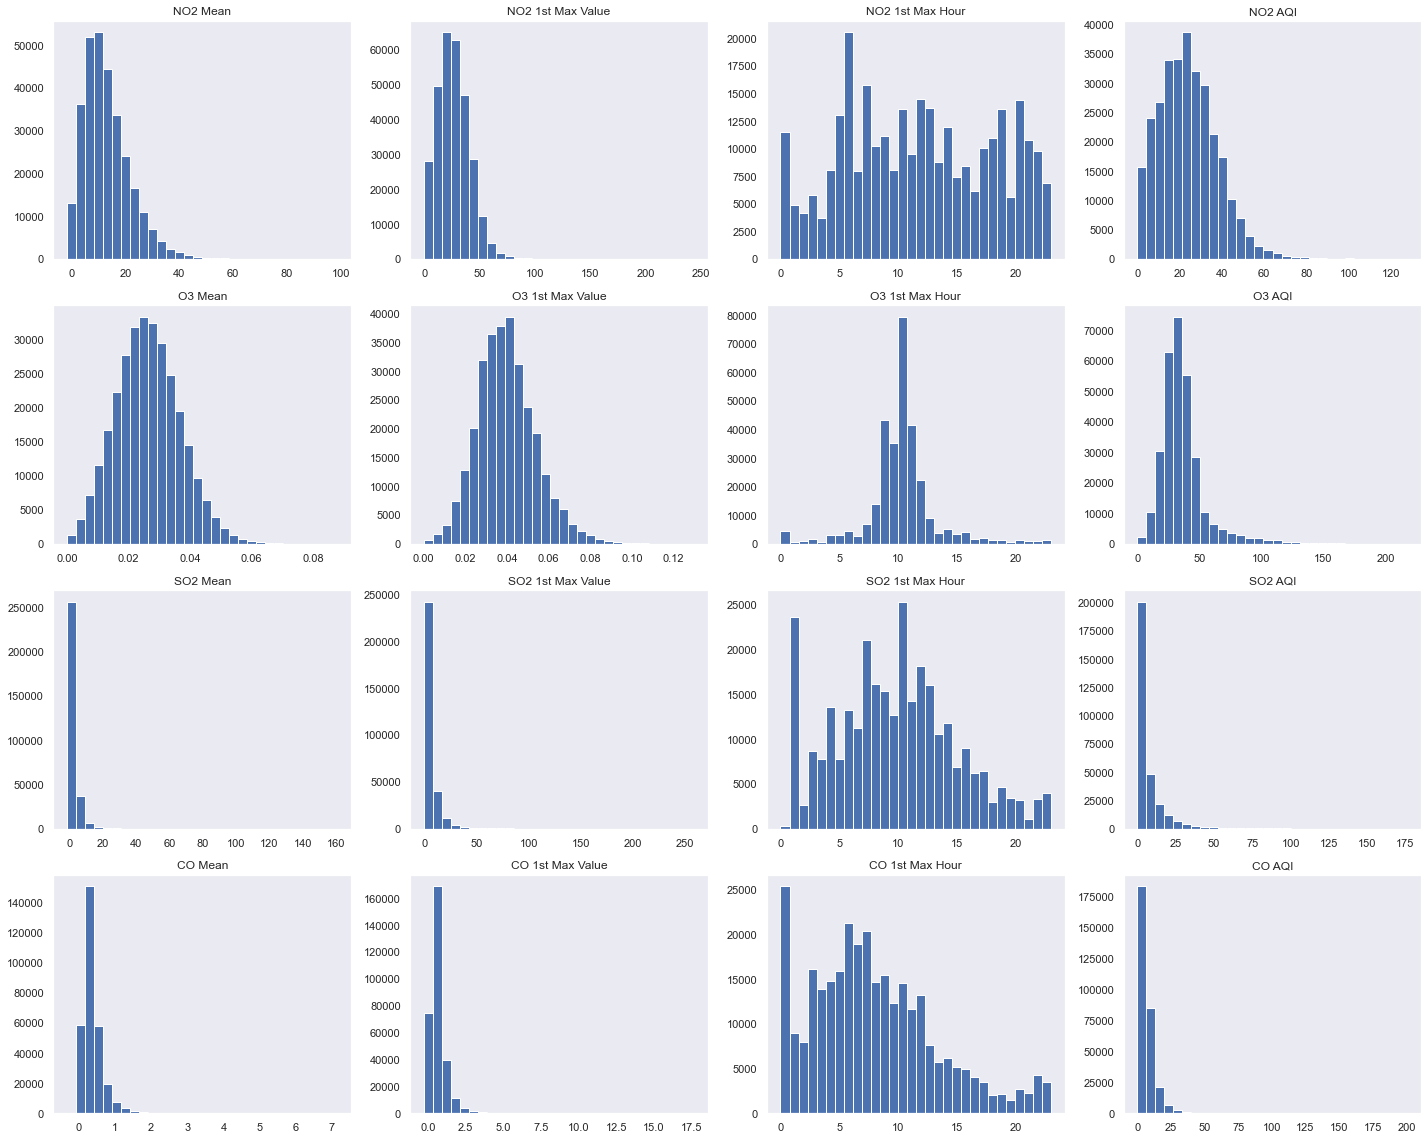

In [47]:
fig, axs = plt.subplots(4, 4, figsize = (20, 16))

hist1 = data_truncated['NO2 Mean'].hist(ax = axs[0,0], grid = False, bins = 30).set_title('NO2 Mean')
hist2 = data_truncated['NO2 1st Max Value'].hist(ax = axs[0,1], grid = False, bins = 30).set_title('NO2 1st Max Value')
hist3 = data_truncated['NO2 1st Max Hour'].hist(ax = axs[0,2], grid = False, bins = 30).set_title('NO2 1st Max Hour')
hist4 = data_truncated['NO2 AQI'].hist(ax = axs[0,3], grid = False, bins = 30).set_title('NO2 AQI')

hist5 = data_truncated['O3 Mean'].hist(ax = axs[1,0], grid = False, bins = 30).set_title('O3 Mean')
hist6 = data_truncated['O3 1st Max Value'].hist(ax = axs[1,1], grid = False, bins = 30).set_title('O3 1st Max Value')
hist7 = data_truncated['O3 1st Max Hour'].hist(ax = axs[1,2], grid = False, bins = 30).set_title('O3 1st Max Hour')
hist8 = data_truncated['O3 AQI'].hist(ax = axs[1,3], grid = False, bins = 30).set_title('O3 AQI')

hist9 = data_truncated['SO2 Mean'].hist(ax = axs[2,0], grid = False, bins = 30).set_title('SO2 Mean')
hist10 = data_truncated['SO2 1st Max Value'].hist(ax = axs[2,1], grid = False, bins = 30).set_title('SO2 1st Max Value')
hist11 = data_truncated['SO2 1st Max Hour'].hist(ax = axs[2,2], grid = False, bins = 30).set_title('SO2 1st Max Hour')
hist12 = data_truncated['SO2 AQI'].hist(ax = axs[2,3], grid = False, bins = 30).set_title('SO2 AQI')

hist13 = data_truncated['CO Mean'].hist(ax = axs[3,0], grid = False, bins = 30).set_title('CO Mean')
hist14 = data_truncated['CO 1st Max Value'].hist(ax = axs[3,1], grid = False, bins = 30).set_title('CO 1st Max Value')
hist15 = data_truncated['CO 1st Max Hour'].hist(ax = axs[3,2], grid = False, bins = 30).set_title('CO 1st Max Hour')
hist16 = data_truncated['CO AQI'].hist(ax = axs[3,3], grid = False, bins = 30).set_title('CO AQI')

plt.tight_layout()

In [48]:
data_skew = data_truncated.drop(['date', 'State Code', 'City', 'AQI_class', 'OverallAQI'], 
                              axis = 1).skew().reset_index()
data_skew.columns = ['column', 'skewness']

In [49]:
data_skew

,column,skewness
0,NO2 Mean,1.218090
1,NO2 1st Max Value,0.849144
2,NO2 1st Max Hour,0.014462
3,NO2 AQI,0.783235
4,O3 Mean,0.268814
5,O3 1st Max Value,0.548164
6,O3 1st Max Hour,0.433156
7,O3 AQI,2.407994
8,SO2 Mean,4.344565
9,SO2 1st Max Value,4.832224


In [50]:
fair = []
moderate = []
high = []

for i in range(data_skew.shape[0]):
    if -0.5 <= data_skew.iloc[i][1] <= 0.5:
        fair.append(data_skew.iloc[i][0])
    elif (-1 <= data_skew.iloc[i][1] <= -0.5) | (0.5 <= data_skew.iloc[i][1] <= 1):
        moderate.append(data_skew.iloc[i][0])
    elif (data_skew.iloc[i][1] > 1) | (data_skew.iloc[i][1] < -1):
        high.append(data_skew.iloc[i][0])
print('Fairly skewed : ', fair)
print('Moderately skewed : ', moderate)
print('Highly skewed : ', high)

Fairly skewed :  ['NO2 1st Max Hour', 'O3 Mean', 'O3 1st Max Hour', 'SO2 1st Max Hour']
Moderately skewed :  ['NO2 1st Max Value', 'NO2 AQI', 'O3 1st Max Value', 'CO 1st Max Hour']
Highly skewed :  ['NO2 Mean', 'O3 AQI', 'SO2 Mean', 'SO2 1st Max Value', 'CO Mean', 'CO 1st Max Value', 'CO AQI', 'SO2 AQI']


## Data Normalization

### Power Transform

In [51]:
from sklearn.preprocessing import power_transform

In [52]:
df_power = data_truncated.copy()

In [53]:
skewed = high + moderate

In [54]:
for x in skewed:
    df_power[[x]] = power_transform(df_power[[x]], method = 'yeo-johnson', standardize = True, copy = True)

In [55]:
df_power[skewed].skew()

NO2 Mean            -0.013057
O3 AQI               0.047284
SO2 Mean             0.080513
SO2 1st Max Value    0.063673
CO Mean              0.015596
CO 1st Max Value     0.052230
CO AQI               0.002914
SO2 AQI              0.059888
NO2 1st Max Value   -0.028060
NO2 AQI             -0.034559
O3 1st Max Value    -0.010756
CO 1st Max Hour     -0.069729
dtype: float64

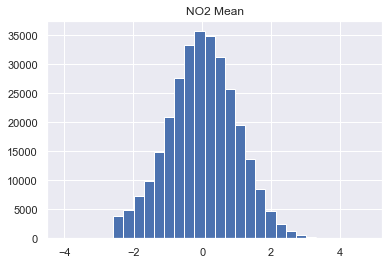

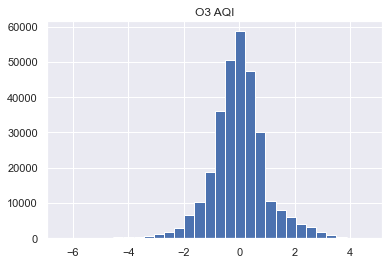

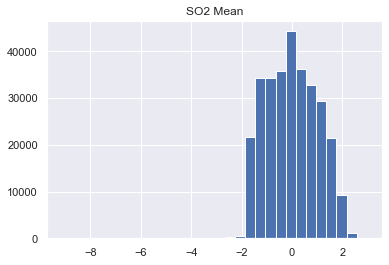

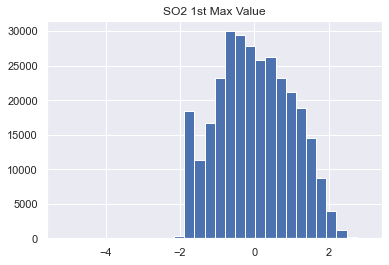

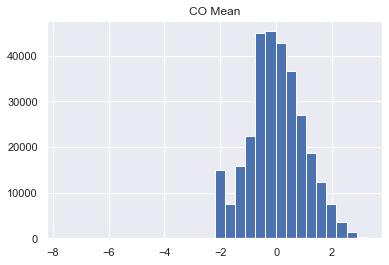

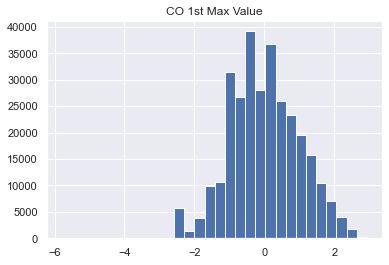

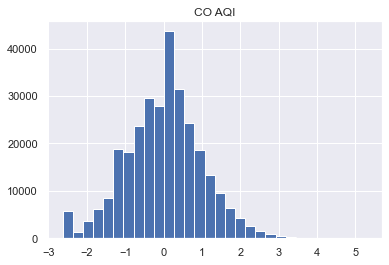

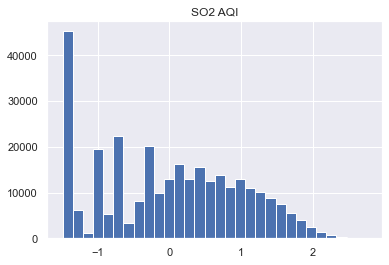

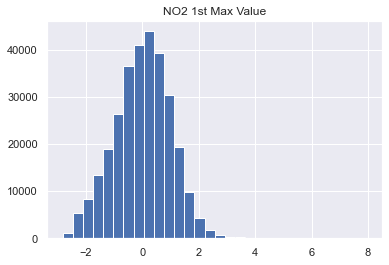

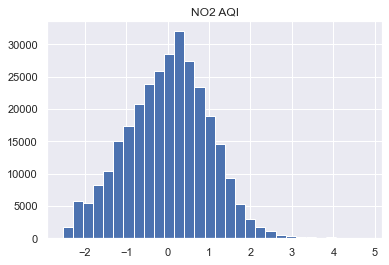

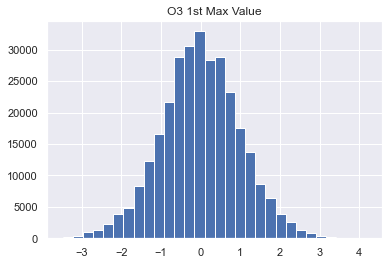

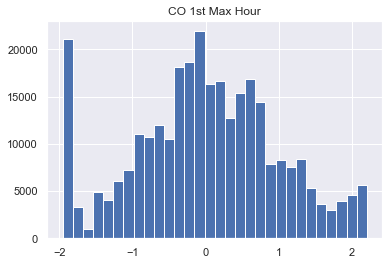

In [56]:
for x in skewed:
    df_power[x].hist(bins = 30)
    plt.title(x)
    plt.show()

In [57]:
df_power

,date,State Code,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 AQI,OverallAQI,AQI_class
0,2000-01-01,4,97,0.746478,0.953184,10.50,0.938553,0.023000,0.374691,10.00,...,0.695188,0.667319,13.25,1.301907,1.926308,1.102809,1.928132,0.692301,37.50,good
1,2000-01-01,4,117,2.124257,2.619778,19.50,2.703012,0.014896,-0.438409,9.00,...,0.412181,0.140605,7.25,1.544481,1.769296,1.893939,1.721492,0.242847,72.50,moderate
2,2000-01-01,4,126,0.561021,0.980861,18.50,0.996546,0.019062,-0.342999,8.50,...,0.209138,0.323886,9.50,0.309029,1.171785,1.951910,1.066955,0.447831,38.00,good
3,2000-01-01,6,4,0.729902,0.980861,19.00,0.996546,0.013333,-0.732702,10.00,...,1.255418,0.841842,8.50,1.923738,2.035968,-0.418896,2.081650,0.895537,38.00,good
4,2000-01-01,6,14,-0.196576,-0.756622,2.00,-0.762533,0.015125,-1.316030,15.00,...,0.076009,-0.060236,12.50,0.745961,0.648809,-0.014847,0.573835,-0.101300,19.00,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301417,2015-12-31,25,17,0.395576,-0.280775,13.50,-0.259242,0.021750,-0.915256,8.75,...,-0.706744,-0.979896,8.50,-0.208272,-0.641681,0.256205,-0.684887,-1.488693,24.75,good
301418,2015-12-31,39,33,2.090301,1.456126,18.00,1.438517,0.004958,-2.136495,9.00,...,0.965255,0.815346,13.50,1.187662,1.137417,1.033013,1.038586,0.812198,46.00,good
301419,2015-12-31,40,127,-0.250672,-0.496189,15.25,-0.542973,0.021552,0.114772,13.00,...,0.358466,0.037176,11.75,0.320064,0.668511,0.466320,0.612154,0.143339,37.25,good
301420,2015-12-31,44,48,0.020667,0.053019,6.00,0.056856,0.029167,0.391641,10.00,...,-0.506413,-0.670272,7.25,-0.192303,-0.286164,0.078088,-0.225366,-0.684896,41.25,good


In [58]:
df_power['year'] = pd.DatetimeIndex(df_power['date']).year
df_power['Month'] = pd.DatetimeIndex(df_power['date']).month
df_power['day'] = pd.DatetimeIndex(df_power['date']).day

In [59]:
df_power.columns

Index(['date', 'State Code', 'City', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean', 'O3 1st Max Value',
       'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean', 'SO2 1st Max Value',
       'SO2 1st Max Hour', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour',
       'CO AQI', 'SO2 AQI', 'OverallAQI', 'AQI_class', 'year', 'Month', 'day'],
      dtype='object')

In [60]:
data_transformed = df_power.drop('date', axis = 1)

In [61]:
data_transformed.drop('OverallAQI', axis = 1, inplace = True)

In [62]:
data_transformed['AQI_class'] = encoder.fit_transform(data_transformed['AQI_class'])

## Feature Reduction

In [63]:
data_red =data_transformed.drop([ 'State Code', 'City','NO2 AQI','O3 AQI','CO AQI', 'SO2 AQI'],axis=1)

<AxesSubplot:>

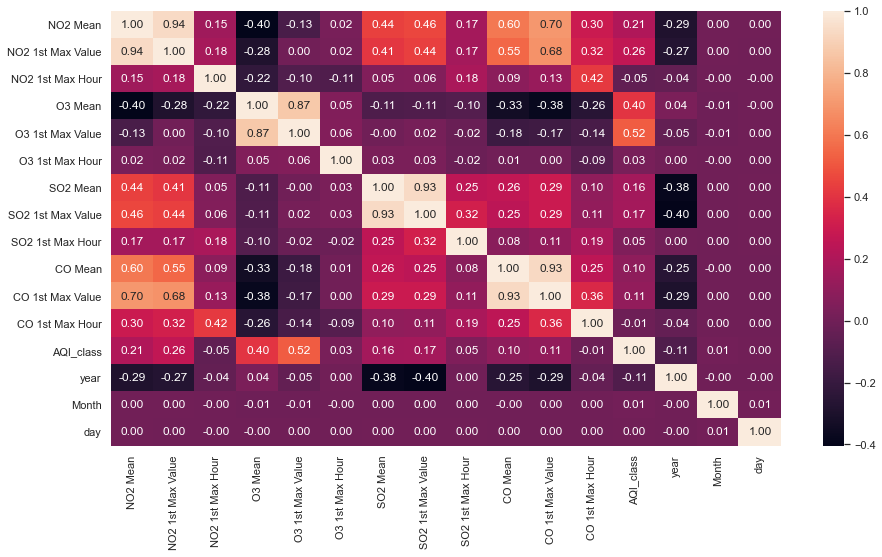

In [64]:
plt.figure(figsize = (15,8))

sns.heatmap(data_red.corr(),annot = True, fmt=".2f")

In [65]:
data_transformed.drop(['NO2 1st Max Value', 'SO2 1st Max Value', 'CO 1st Max Value', 
                      'O3 1st Max Value'], axis = 1, inplace =True)

### Detection of Multicolinearity : VIF

* VIF (Variable Inflation Factor) determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

* VIF = 1 / (1 - R^2)

* VIF starts at 1 and has no upper limits
* VIF = 1, no correlation between the indepenedent variable and the ohter variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return (vif.sort_values(by = 'VIF', ascending = False))

In [67]:
calc_vif(data_transformed.drop('AQI_class', axis = 1))

,variables,VIF
14,year,76.729565
5,O3 Mean,41.814729
6,O3 1st Max Hour,12.700855
12,CO AQI,12.007788
2,NO2 Mean,11.685422
4,NO2 AQI,11.436076
10,CO Mean,9.296784
13,SO2 AQI,7.072592
8,SO2 Mean,6.826151
3,NO2 1st Max Hour,5.894135


In [68]:
data_transformed['year'] = encoder.fit_transform(data_transformed['year'])

* Creating subsets of the dataset for each pollutants and fitting model to predict the AQI of pollutants seperately

In [69]:
x_o3 = data_transformed[['State Code', 'City', 'O3 Mean',
       'O3 1st Max Hour', 'year', 'Month', 'day']]
y_o3 = data_transformed['O3 AQI']

In [70]:
x_so2 = data_transformed[['State Code', 'City', 'SO2 Mean',
       'SO2 1st Max Hour', 'year', 'Month', 'day']]
y_so2 = data_transformed['SO2 AQI']

In [71]:
x_co = data_transformed[['State Code', 'City', 'CO Mean',
       'CO 1st Max Hour', 'year', 'Month', 'day']]
y_co = data_transformed['CO AQI']

In [72]:
x_no2 = data_transformed[['State Code', 'City', 'NO2 Mean', 'NO2 1st Max Hour', 'year', 'Month', 'day']]
y_no2 = data_transformed['NO2 AQI']

In [73]:
calc_vif(x_o3)

,variables,VIF
3,O3 1st Max Hour,8.475260
2,O3 Mean,6.155397
5,Month,4.361677
6,day,3.792552
1,City,3.617702
4,year,3.579052
0,State Code,2.590289


In [74]:
calc_vif(x_no2)

,variables,VIF
5,Month,3.984713
3,NO2 1st Max Hour,3.765983
4,year,3.579839
6,day,3.525378
1,City,3.300854
0,State Code,2.525010
2,NO2 Mean,1.111072


In [75]:
calc_vif(x_so2)

,variables,VIF
4,year,4.100181
3,SO2 1st Max Hour,4.084415
5,Month,3.955486
6,day,3.507879
1,City,3.264731
0,State Code,2.726788
2,SO2 Mean,1.323016


In [76]:
calc_vif(x_co)

,variables,VIF
5,Month,3.780879
6,day,3.387197
4,year,3.334435
1,City,3.231862
0,State Code,2.529087
2,CO Mean,1.183312
3,CO 1st Max Hour,1.072742


* For predicting the AQI category from the AQI of pollutants

In [78]:
aqi_x = data_transformed[['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']]
aqi_y = data_transformed['AQI_class']
calc_vif(aqi_x)

,variables,VIF
0,NO2 AQI,2.139147
3,CO AQI,1.948388
1,SO2 AQI,1.235700
2,O3 AQI,1.055744


## Modeling

### Model 1 : NO2

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
ln_model = LinearRegression()

In [80]:
x_no2_train, x_no2_test, y_no2_train, y_no2_test = train_test_split(x_no2, y_no2, random_state = 42, test_size = 0.2)

In [81]:
from sklearn import set_config
set_config(print_changed_only = False)

In [82]:
ln_model.fit(x_no2_train, y_no2_train)
no2_ln = ln_model.predict(x_no2_test)

from sklearn.metrics import accuracy_score as acc, mean_squared_error as mse, r2_score as r2, f1_score as f1, precision_score as prec

print('MSE= ', mse(y_no2_test, no2_ln))
print('R2= ', r2(y_no2_test, no2_ln))

MSE=  0.11846160887375787
R2=  0.8818065112828561


In [83]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

dt_model.fit(x_no2_train, y_no2_train)
no2_dt = dt_model.predict(x_no2_test)

print('MSE= ', mse(y_no2_test, no2_dt))
print('R2= ', r2(y_no2_test, no2_dt))

MSE=  0.18980596744326653
R2=  0.8106236300119849


### Model2: SO2

In [87]:
x_so2_train, x_so2_test, y_so2_train, y_so2_test = train_test_split(x_so2, y_so2, random_state = 42, test_size = 0.2)

ln_model.fit(x_so2_train, y_so2_train)
so2_ln = ln_model.predict(x_so2_test)

print('MSE= ', mse(y_so2_test, so2_ln))
print('R2= ', r2(y_so2_test, so2_ln))

MSE=  0.13505687266716218
R2=  0.8641829381653493


### Model3: CO

In [88]:
x_co_train, x_co_test, y_co_train, y_co_test = train_test_split(x_co, y_co, random_state = 42, test_size = 0.2)

ln_model.fit(x_co_train, y_co_train)
co_ln = ln_model.predict(x_co_test)

print('MSE= ', mse(y_co_test, co_ln))
print('R2= ', r2(y_co_test, co_ln))

MSE=  0.11355373539896281
R2=  0.8860126318182938


### Model4: O3

In [89]:
x_o3_train, x_o3_test, y_o3_train, y_o3_test = train_test_split(x_o3, y_o3, random_state = 42, test_size = 0.2)

ln_model.fit(x_o3_train, y_o3_train)
o3_ln = ln_model.predict(x_o3_test)

print('MSE= ', mse(y_o3_test, o3_ln))
print('R2= ', r2(y_o3_test, o3_ln))

MSE=  0.27530297844212037
R2=  0.724047083686788


### Model 5 : AQI class

In [84]:
aqi_x_train, aqi_x_test, aqi_y_train, aqi_y_test = train_test_split(aqi_x, aqi_y, random_state = 42, test_size = 0.2)

In [85]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(aqi_x_train, aqi_y_train)
aqi_dt = classifier.predict(aqi_x_test)

print('Accuracy score= ', acc(aqi_y_test, aqi_dt))

Accuracy score=  0.9999502363772083


### Model for webhosting

In [91]:
data_raw = data_truncated[['NO2 AQI', 'SO2 AQI', 'CO AQI', 'O3 AQI', 'AQI_class']] # no transformation applied

In [92]:
data_raw

,NO2 AQI,SO2 AQI,CO AQI,O3 AQI,AQI_class
0,37.00,7.25,22.50,37.50,good
1,72.50,4.00,19.50,27.75,moderate
2,38.00,5.25,12.25,29.00,good
3,38.00,9.50,25.00,25.00,good
4,13.00,2.50,8.50,19.00,good
...,...,...,...,...,...
301417,19.00,0.00,3.00,24.75,good
301418,46.00,8.50,12.00,12.00,good
301419,15.50,3.50,8.75,37.25,good
301420,23.25,1.00,4.50,41.25,good


In [93]:
data_raw['AQI_class'] = encoder.fit_transform(data_raw['AQI_class'])

In [94]:
x_raw = data_raw.drop('AQI_class', axis = 1)
y_raw = data_raw['AQI_class']

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw, test_size = 0.2, random_state = 42) 

classifier.fit(x_train, y_train)
aqi_pred = classifier.predict(x_test)

print('Accuracy score= ', acc(y_test, aqi_pred))

Accuracy score=  0.9999336485029443


In [98]:
aqis = [75, 5, 22, 30]
classifier.predict([aqis])

array([1])